## <font color=Green>GMD Figure 6 </font>  
#### <font color=blue> *VARIANCE DECOMPOSITION* PLOT </font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import netCDF4 as nc
from pandas.plotting import table 
import xarray as xr

#### $\color{blue}{\text{List of Modules and Data to be used}}$

In [2]:
# Load FACTS workflow data as a dataframe.
df = pd.read_fwf('../001_GMD_IP_Modules_Data/ModuleTest_DataFile_List_coupling.txt',comment = '#')
df

,Component,Module,sub_Module,DataFile
0,GSAT,fair,temperature,temperature.fair.temperature_gsat.nc
1,GSAT,fair,temperature,temperature.fair.temperature_oceantemp.nc
2,GSAT,fair,temperature,temperature.fair.temperature_ohc.nc
3,TE,tlm,sterodynamics,ocean.tlm.sterodynamics_globalsl.nc
4,Glaciers,ipccar5,glaciers,ar5glaciers.ipccar5.glaciers_globalsl.nc
5,Glaciers,emulandice,glaciers,emuglaciers.emulandice.glaciers_globalsl.nc
6,GrIS,bamber19,icesheets,bamber19.bamber19.icesheets_GIS_globalsl.nc
7,GrIS,FittedISMIP,GrIS,GrIS1f.FittedISMIP.GrIS_GIS_globalsl.nc
8,GrIS,emulandice,GrIS,emuGrIS.emulandice.GrIS_globalsl.nc
9,AIS,ipccar5,icesheets,ar5AIS.ipccar5.icesheets_AIS_globalsl.nc


#### $\color{Red}{\text{Load Module data from ==> facts-experiments/221209}}$

#### $\color{green}{\text{Adapting from koppGit Extract .nc data \& Find Variance}}$

In [3]:
EXPDATE     = 221209
MODNO       = df.index.values;   # Number of datasets Module outputs
SCENARIO    = ['ssp585'];
# Workflow Components.
wf1e = ['GrIS-emulandice', 'AIS-emulandice', 'Glaciers-emulandice', 'TE-tlm', 'LWS-ssp']
#WORKFLO = ["wf1e"]; #["wf1e","wf1f","wf2e","wf2f"]
#
#
# Temp DF to store all .nc O/P.      
df_TEMP      = []
#
a = []
ccomp = []
#        
for scenario in SCENARIO:
    #
    for wf in wf1e: 
        #
        # Pick Component acording to workflow.
        #MODULE = df["Module"][val];  SUB_MODULE = df["sub_Module"][val]; COMP = df["Component"][val]; DATAFILE = df["DataFile"][val];
        COMP = wf.split("-")[0]; MODULE = wf.split("-")[1]; 
        val = df.index[ (df['Component'] == COMP) & (df['Module'] == MODULE) ].values[0]
        SUB_MODULE = df["sub_Module"][val];  DATAFILE   = df["DataFile"][val];
        valIND = 0
        #       
        # Skip if data is absent.
        if df["DataFile"][val] == 'XXX':
           continue 
        #
        # Pick the data files & Import nc file to dataframe. 
        dataFOLDER  = '/projects/kopp/facts-experiments/{arg2}/coupling.{arg1}/output/'.format(arg1=scenario,arg2=EXPDATE)
        dataFILE    = 'coupling.{arg1}.'.format(arg1=scenario) + df["DataFile"][val]
        d_nc        = xr.open_dataset(dataFOLDER + dataFILE)
        #print( "DataFILE ==> "+str(df["DataFile"][val])+"\n"+ str(d_nc.dims) + "\n" + str(d_nc.data_vars)+ "\n" + str(d_nc.coords)+"\n"+"-------------"+"\n"+"\n" )
        #
        # Index for time.
        YindST        = np.where(d_nc["years"].values == 2020)[0][0]
        YindEN        = np.where(d_nc["years"].values == 2100)[0][0]
        # Save data into a new variable.
        # sampsloccomponents =  
        ccomp.append(COMP)
        b = d_nc.sea_level_change[:,YindST:YindEN+1,0].values
        a.append(b[None,:] )
#stack all at once
sampsloccomponents = np.vstack(a)
sampsloccomponents = np.transpose(sampsloccomponents,(1,0,2))
        

## Plot: 

#### Global Def

In [4]:
colrs = 'rcbgmyrkcbgm'

yrs=d_nc.years[YindST:YindEN+1].values
vlast=np.zeros(len(yrs));

In [ ]:
# Find the Var.
vars = []
for co in ccomp:
    valIND = 0
    u = np.sum(sampsloccomponents[:,0:valIND+1,:],axis = 1)
    vcur=(np.var(u,axis=0))/1e6
    
    
    matplotlib.patches.Patchcolrs[0]
    hl(i)=patch([yrs np.flip(yrs)],[vcur np.flip(vlast)],);
    vlast=vcur
    vars[valIND,:]=vcur

In [52]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as Patches

# Find the Var.
vars = []; valIND = 0
fig = plt.figure()
ax = fig.add_subplot(111)

for co in ccomp:
    u = np.sum(sampsloccomponents[:,0:valIND+1,:],axis = 1)
    vcur=(np.var(u,axis=0))/1e6

    verts = [
        (yrs[0],vcur[0]), # P0
        (yrs[1],vcur[1]), # P1
        (yrs[2],vcur[2]), # P2
        (yrs[3],vcur[3]), # P3
        (yrs[4],vcur[4]), # P3
        (yrs[5],vcur[5]),
        (yrs[6],vcur[6]),
        (yrs[7],vcur[7]),
        (yrs[8],vcur[8]),
        (2100,vcur[7]),
        (2100,vcur[6]),
        (2100,vcur[5]),
        (2100,vcur[4]),
        (2100,vcur[3]),
        (2100,vcur[2]),
        (2100,vcur[1]),
        (2100,vcur[0]),
        ]

    codes = [Path.MOVETO,
            Path.CURVE3,
            Path.CURVE3,
            Path.CURVE3,
            Path.CURVE3,
            Path.CURVE3,
            Path.CURVE3,
            Path.CURVE3,
            Path.CURVE3,
            Path.CURVE3,
            Path.CURVE3,
            Path.CURVE3,
            Path.CURVE3,
            Path.CURVE3,
            Path.CURVE3,
            Path.CURVE3,
            Path.CURVE3
            ]

    path = Path(verts, codes)

    
    patch = Patches.PathPatch(path, facecolor=colrs[valIND], lw=2)
    ax.add_patch(patch)
    ax.set_xlim(2000,2100)
    ax.set_ylim(0,0.005)
    # plt.gca().set_aspect('equal', adjustable='box')
    # plt.show()
    valIND = valIND +1
plt.show()

AttributeError: 'Figure' object has no attribute 'add_patch'

<Figure size 640x480 with 0 Axes>

In [28]:
vars = [];vcur=[];
valIND = 0
u = np.sum(sampsloccomponents[:,0:valIND+1,:],axis = 1)
vcur=(np.var(u,axis=0))/1e6


ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (4, 9).

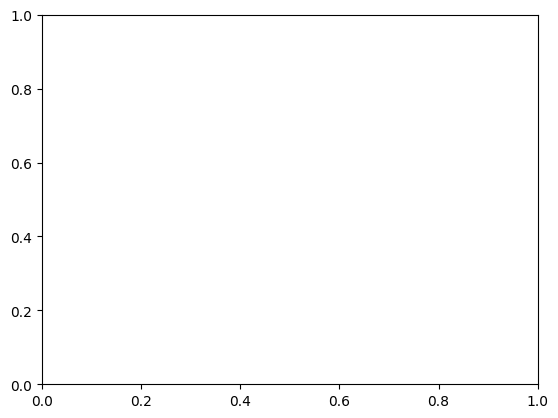

In [13]:
# import modules
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
  
Path = mpath.Path
  
# adjust figure and assign coordinates
fig, ax = plt.subplots()
# pp = mpatches.PathPatch(Path([(0, 0), (10, 5), (10, 10), (20, 10)],
#                              [Path.MOVETO, Path.CURVE3,
#                               Path.CURVE3, Path.CLOSEPOLY]),
#                         transform=ax.transData)
pp = mpatches.PathPatch(Path([yrs, np.flip(yrs),vcur, np.flip(vlast)],
                             [Path.MOVETO, Path.CURVE3,
                              Path.CURVE3, Path.CLOSEPOLY]),
                        transform=ax.transData)
  
# depict illustration
ax.add_patch(pp)
plt.show()

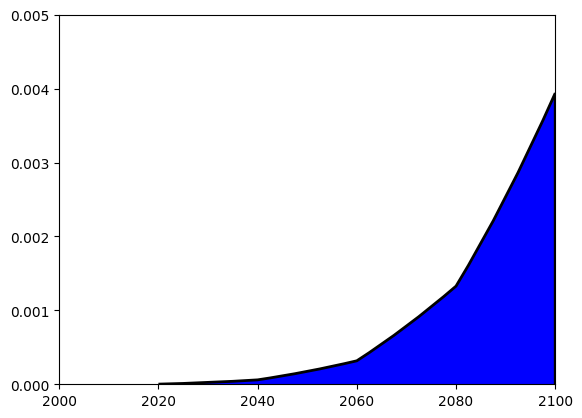

In [41]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as Patches

verts = [
    (yrs[0],vcur[0]), # P0
    (yrs[1],vcur[1]), # P1
    (yrs[2],vcur[2]), # P2
    (yrs[3],vcur[3]), # P3
    (yrs[4],vcur[4]), # P3
    (yrs[5],vcur[5]),
    (yrs[6],vcur[6]),
    (yrs[7],vcur[7]),
    (yrs[8],vcur[8]),
    (2100,vcur[7]),
    (2100,vcur[6]),
    (2100,vcur[5]),
    (2100,vcur[4]),
    (2100,vcur[3]),
    (2100,vcur[2]),
    (2100,vcur[1]),
    (2100,vcur[0]),
    ]

codes = [Path.MOVETO,
         Path.CURVE3,
         Path.CURVE3,
         Path.CURVE3,
         Path.CURVE3,
         Path.CURVE3,
         Path.CURVE3,
         Path.CURVE3,
         Path.CURVE3,
         Path.CURVE3,
         Path.CURVE3,
         Path.CURVE3,
         Path.CURVE3,
         Path.CURVE3,
         Path.CURVE3,
         Path.CURVE3,
         Path.CURVE3
         ]

path = Path(verts, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = Patches.PathPatch(path, facecolor=colrs[0], lw=2)
ax.add_patch(patch)
ax.set_xlim(2000,2100)
ax.set_ylim(0,0.005)
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()

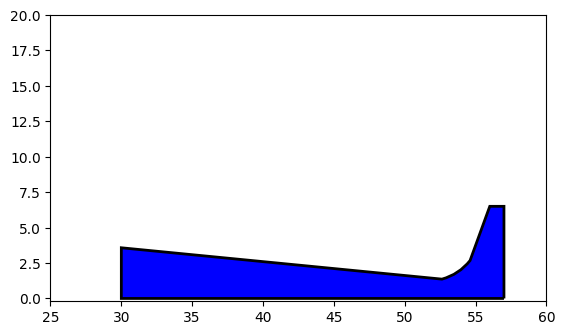

In [21]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as Patches

verts = [
    (57.000000, 0.000000), # P0
    (57.000000, 6.500000), # P1
    (56.000000, 6.500000), # P2
    (54.608163, 2.675960), # P3
    (53.832652, 1.692228), # P4
    (52.624106, 1.362741), # P5
    (30.000000, 3.575370), # P7
    (30.000000, 0.000000), # P8
    (57.000000, 0.000000) # P0
    ]

codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CURVE3,
         Path.CURVE3,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO
         ]

path = Path(verts, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = Patches.PathPatch(path, facecolor='blue', lw=2)
ax.add_patch(patch)
ax.set_xlim(25,60)
ax.set_ylim(-0.2,20)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [19]:
verts = [
    (yrs[0],vcur[0]), # P0
    (yrs[1],vcur[1]), # P1
    (yrs[2],vcur[2]), # P2
    (yrs[3],vcur[3]), # P3
    ]

In [16]:
yrs[0]

2020

In [ ]:
# Colors updated to match updated SPM colors
color_GrIS      = np.array([0, 173,207])/255
color_AIS       = np.array([23  ,60 ,  102])/255
color_Glaciers  = np.array([247 ,148,  32])/255
color_TE        = np.array([231 ,29 ,  37])/255
color_ssp585    = np.array([149 ,27 ,  30])/255
#
# Workflow Components.
wf1e = ['GrIS-emulandice', 'AIS-emulandice', 'Glaciers-emulandice', 'TE-tlm']
wf1f = ['GrIS-FittedISMIP', 'AIS-ipccar5', 'Glaciers-ipccar5-GMIP2', 'TE-tlm']
wf2e = ['GrIS-emulandice', 'AIS-larmip', 'Glaciers-emulandice','TE-tlm']
wf2f = ['GrIS-FittedISMIP', 'AIS-larmip', 'Glaciers-ipccar5-GMIP2','TE-tlm']
WORKFLO = ["wf1e","wf1f","wf2e","wf2f"]

### Plot figure 

In [ ]:
# Set global figure size and dots per inch
plt.rcParams.update({'figure.figsize':(7,10), 'figure.dpi':100})
# Initialize the grid
grid = plt.GridSpec(4, 5, wspace=0.4, hspace=0.3)
#
# Axis Spec.
xlim    = [2010,2100]
ylim    = [0 , 400]
xlim1   = [.1,2]
#
XAX1        = df_ptile.loc[:,"Year"].unique()
SSP         = df_ptile.loc[:,"SSP"].unique()
COMPONENT   = df_ptile.loc[:,"Component"].unique()
MODULE      = df_ptile.loc[:,"Module"].unique()
#
# Subplot Axis.
ax1_wf1e = plt.subplot(grid[0, :4]); ax2_wf1e = plt.subplot(grid[0, 4]);
ax1_wf1f = plt.subplot(grid[1, :4]); ax2_wf1f = plt.subplot(grid[1, 4]);
ax1_wf2e = plt.subplot(grid[2, :4]); ax2_wf2e = plt.subplot(grid[2, 4]);
ax1_wf2f = plt.subplot(grid[3, :4]); ax2_wf2f = plt.subplot(grid[3, 4]);
#
ss= "ssp585" #for ss in SSP: # Loop through each SSP
for ww in WORKFLO:
    # Select subplot axis based on workflow
    ax1 = eval(f'ax1_{ww}');    ax2 = eval(f'ax2_{ww}')
    # X axis for the Right (Bar) Plot.
    XAX2 = np.array([[.2,.2]]) 
    #
    # Plot Left 
    # Within a single sub-plot, Loop over individual WF components.
    for WFcomp in np.arange(len(eval(ww))):                 # Index of elements within each workflow (e.g. GrIS-emulandice)
        CoMpOnEnT   = (eval(ww)[WFcomp]).split('-')[0]      # e.g. GrIS
        MoDuLe      = (eval(ww)[WFcomp]).split('-')[1]      # e.g. emulandice
        Yax1        = df_ptile.loc[((df_ptile['SSP'] == ss) & (df_ptile["Component"] == CoMpOnEnT) & (df_ptile['Module'] == MoDuLe)),"col_50" ] #Glacier
        ax1.plot(XAX1, Yax1, label = f'{CoMpOnEnT} ({MoDuLe})', color = eval(f'color_{CoMpOnEnT}'))
        # Plot Right
        Yax2_1 = df_ptile.loc[((df_ptile['SSP'] == ss) & (df_ptile["Component"] == CoMpOnEnT) & (df_ptile['Module'] == MoDuLe) & (df_ptile['Year'] == 2100)),("col_5", "col_95") ].values
        Yax2_2 = df_ptile.loc[((df_ptile['SSP'] == ss) & (df_ptile["Component"] == CoMpOnEnT) & (df_ptile['Module'] == MoDuLe) & (df_ptile['Year'] == 2100)),("col_17", "col_83") ].values 
        Yax2_3 = df_ptile.loc[((df_ptile['SSP'] == ss) & (df_ptile["Component"] == CoMpOnEnT) & (df_ptile['Module'] == MoDuLe) & (df_ptile['Year'] == 2100)),("col_50","col_50") ].values 
        #
        ax2.plot(XAX2.transpose(), Yax2_1.transpose(), label = f'{CoMpOnEnT} ({MoDuLe})', color = eval(f'color_{CoMpOnEnT}'),linewidth=1)
        ax2.plot(XAX2.transpose(), Yax2_2.transpose(), label = f'{CoMpOnEnT} ({MoDuLe})', color = eval(f'color_{CoMpOnEnT}'),linewidth=2)
        ax2.plot(XAX2.transpose(), Yax2_3.transpose(), marker = 'o', color = eval(f'color_{CoMpOnEnT}'),ms = 2,mfc='none')
        XAX2 = XAX2+.15
        #
    ax1.tick_params(axis='both', labelsize=7)
    ax1.legend(loc='upper left',prop={'size': 6}); ax1.set_xlim(xlim); ax1.set_ylim(ylim)
    ax1.set_ylabel("SLC (mm)"); ax1.grid()
    ax1.text(.9, .91, ww, horizontalalignment='right',verticalalignment='top',weight='bold',fontsize=12,transform=ax1.transAxes)
    ax2.set_ylim(ylim); ax2.axis('off'); ax2.set_xlim(xlim1);
plt.suptitle('GMD Fig 2: GMSL projections for {one}'.format(one=ss),y=0.91)
# plt.supxlabel('common x label'); plt.supylabel('common y label')
plt.show()

In [ ]:
# Workflows differ based on their handeling of the cryospheric components (Icesheets and glaciers) 
# They use common modules for projecting vertical land motion (kopp14/verticallandmotion), Sterodynamics and global mean thermal expansion (tlm/oceandynamics), and land water storage (ssp/landwaterstorage